# Exploratorio Salary Data

In [11]:
# Librerías básicas para análisis de datos
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importamos de la librería sklearn, la función train_test_split
from sklearn.model_selection import train_test_split
# Importamos la función StandardScaler para normalizar las variables (aunque no la usaremos en este ejemplo básico)
from sklearn.preprocessing import StandardScaler
# Importamos la función LinearRegression de la librería sklearn para inicializar el modelo
from sklearn.linear_model import LinearRegression

# Configuración para mejorar la visualización de gráficos
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (10, 6)

# Importación de datos

In [12]:
dataset = pd.read_csv('../data/Salary_Data.csv')

# Análisis Exploratorio de Datos

En esta sección vamos a explorar el dataset para entender mejor su estructura, las variables que contiene y sus características principales.

## 1. Información básica del dataset

In [13]:
# Mostrar las primeras filas del dataset
print("Primeras 5 filas del dataset:")
print(dataset.head())

print("\n" + "="*50)

# Información general del dataset
print("\nInformación general del dataset:")
print(dataset.info())

print("\n" + "="*50)

# Dimensiones del dataset
print(f"\nDimensiones del dataset: {dataset.shape}")
print(f"Número de filas: {dataset.shape[0]}")
print(f"Número de columnas: {dataset.shape[1]}")

print("\n" + "="*50)

# Nombres de las columnas
print("\nNombres de las columnas:")
print(dataset.columns.tolist())

Primeras 5 filas del dataset:
   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0


Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes
None


Dimensiones del dataset: (30, 2)
Número de filas: 30
Número de columnas: 2


Nombres de las columnas:
['YearsExperience', 'Salary']


## 2. Estadísticas descriptivas

In [14]:
# Estadísticas descriptivas del dataset
print("Estadísticas descriptivas:")
print(dataset.describe())

print("\n" + "="*60)

# Análisis más detallado por variable
print("\nAnálisis detallado por variable:")
print("\n--- AÑOS DE EXPERIENCIA ---")
print(f"Media: {dataset['YearsExperience'].mean():.2f} años")
print(f"Mediana: {dataset['YearsExperience'].median():.2f} años")
print(f"Desviación estándar: {dataset['YearsExperience'].std():.2f} años")
print(f"Mínimo: {dataset['YearsExperience'].min():.2f} años")
print(f"Máximo: {dataset['YearsExperience'].max():.2f} años")
print(f"Rango: {dataset['YearsExperience'].max() - dataset['YearsExperience'].min():.2f} años")

print("\n--- SALARIO ---")
print(f"Media: ${dataset['Salary'].mean():,.2f}")
print(f"Mediana: ${dataset['Salary'].median():,.2f}")
print(f"Desviación estándar: ${dataset['Salary'].std():,.2f}")
print(f"Mínimo: ${dataset['Salary'].min():,.2f}")
print(f"Máximo: ${dataset['Salary'].max():,.2f}")
print(f"Rango: ${dataset['Salary'].max() - dataset['Salary'].min():,.2f}")

Estadísticas descriptivas:
       YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000


Análisis detallado por variable:

--- AÑOS DE EXPERIENCIA ---
Media: 5.31 años
Mediana: 4.70 años
Desviación estándar: 2.84 años
Mínimo: 1.10 años
Máximo: 10.50 años
Rango: 9.40 años

--- SALARIO ---
Media: $76,003.00
Mediana: $65,237.00
Desviación estándar: $27,414.43
Mínimo: $37,731.00
Máximo: $122,391.00
Rango: $84,660.00


## 3. Verificación de valores faltantes y duplicados

In [15]:
# Verificar valores faltantes
print("Valores faltantes por columna:")
print(dataset.isnull().sum())

print("\n" + "="*40)

# Porcentaje de valores faltantes
print("\nPorcentaje de valores faltantes:")
porcentaje_faltantes = (dataset.isnull().sum() / len(dataset)) * 100
print(porcentaje_faltantes)

print("\n" + "="*40)

# Verificar duplicados
duplicados = dataset.duplicated().sum()
print(f"\nNúmero de filas duplicadas: {duplicados}")

if duplicados > 0:
    print("\nFilas duplicadas:")
    print(dataset[dataset.duplicated()])
else:
    print("No se encontraron filas duplicadas.")

print("\n" + "="*40)

# Verificar tipos de datos
print("\nTipos de datos:")
print(dataset.dtypes)

Valores faltantes por columna:
YearsExperience    0
Salary             0
dtype: int64


Porcentaje de valores faltantes:
YearsExperience    0.0
Salary             0.0
dtype: float64


Número de filas duplicadas: 0
No se encontraron filas duplicadas.


Tipos de datos:
YearsExperience    float64
Salary             float64
dtype: object


## 4. Visualizaciones exploratorias

### 4.1 Gráfico de dispersión - Relación entre experiencia y salario

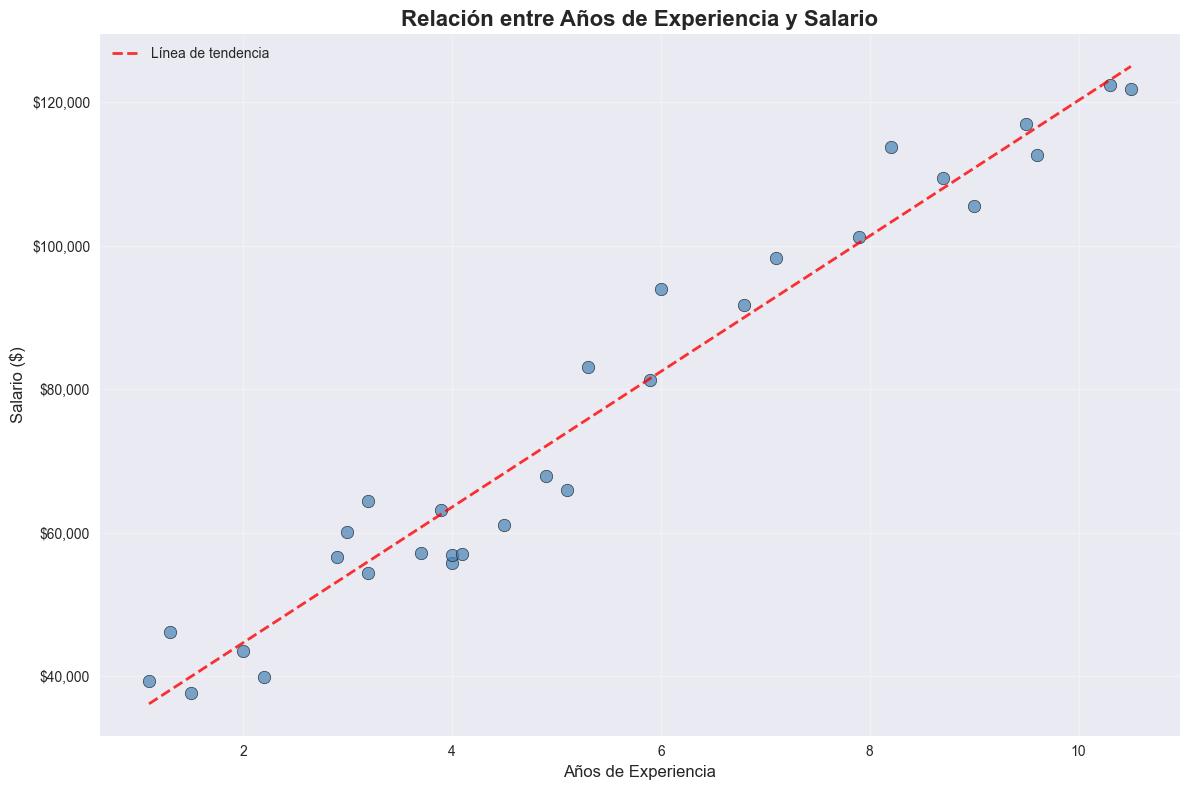


Coeficiente de correlación entre años de experiencia y salario: 0.9782
Interpretación: Correlación muy fuerte y positiva


In [16]:
# Gráfico de dispersión
plt.figure(figsize=(12, 8))
plt.scatter(dataset['YearsExperience'], dataset['Salary'], 
           alpha=0.7, s=80, color='steelblue', edgecolors='black', linewidth=0.5)
plt.title('Relación entre Años de Experiencia y Salario', fontsize=16, fontweight='bold')
plt.xlabel('Años de Experiencia', fontsize=12)
plt.ylabel('Salario ($)', fontsize=12)
plt.grid(True, alpha=0.3)

# Añadir línea de tendencia
z = np.polyfit(dataset['YearsExperience'], dataset['Salary'], 1)
p = np.poly1d(z)
plt.plot(dataset['YearsExperience'], p(dataset['YearsExperience']), 
         "r--", alpha=0.8, linewidth=2, label='Línea de tendencia')
plt.legend()

# Mejorar el formato del eje Y
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

plt.tight_layout()
plt.show()

# Calcualar correlación
correlacion = dataset['YearsExperience'].corr(dataset['Salary'])
print(f"\nCoeficiente de correlación entre años de experiencia y salario: {correlacion:.4f}")

if correlacion > 0.8:
    print("Interpretación: Correlación muy fuerte y positiva")
elif correlacion > 0.6:
    print("Interpretación: Correlación fuerte y positiva")
elif correlacion > 0.4:
    print("Interpretación: Correlación moderada y positiva")
elif correlacion > 0.2:
    print("Interpretación: Correlación débil y positiva")
else:
    print("Interpretación: Correlación muy débil o inexistente")

### 4.2 Histogramas para analizar la distribución de las variables

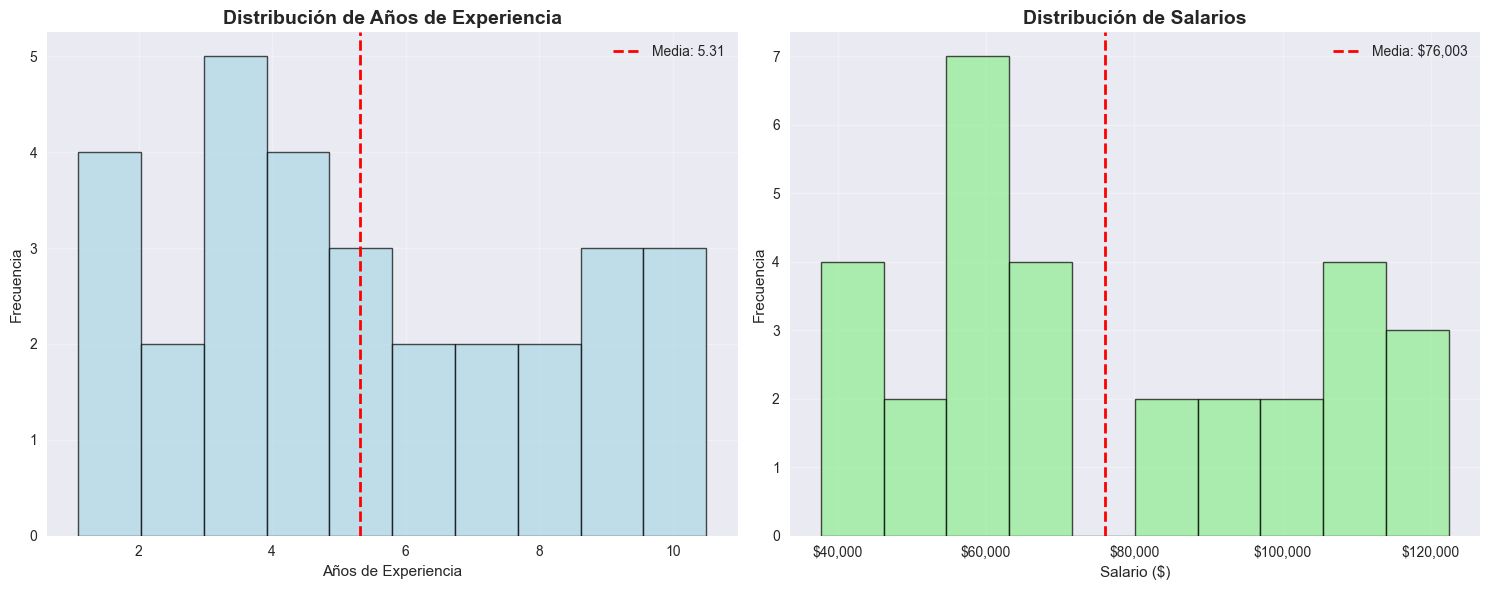

Análisis de distribución:
Años de experiencia - Asimetría: 0.380
Salario - Asimetría: 0.354

Interpretación de asimetría:
- Valores cercanos a 0: distribución simétrica
- Valores positivos: cola larga hacia la derecha
- Valores negativos: cola larga hacia la izquierda


In [17]:
# Crear subplots para los histogramas
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Histograma de años de experiencia
axes[0].hist(dataset['YearsExperience'], bins=10, alpha=0.7, color='lightblue', 
             edgecolor='black', linewidth=1)
axes[0].set_title('Distribución de Años de Experiencia', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Años de Experiencia')
axes[0].set_ylabel('Frecuencia')
axes[0].grid(True, alpha=0.3)

# Añadir línea de media
mean_exp = dataset['YearsExperience'].mean()
axes[0].axvline(mean_exp, color='red', linestyle='--', linewidth=2, 
                label=f'Media: {mean_exp:.2f}')
axes[0].legend()

# Histograma de salarios
axes[1].hist(dataset['Salary'], bins=10, alpha=0.7, color='lightgreen', 
             edgecolor='black', linewidth=1)
axes[1].set_title('Distribución de Salarios', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Salario ($)')
axes[1].set_ylabel('Frecuencia')
axes[1].grid(True, alpha=0.3)

# Añadir línea de media
mean_salary = dataset['Salary'].mean()
axes[1].axvline(mean_salary, color='red', linestyle='--', linewidth=2, 
                label=f'Media: ${mean_salary:,.0f}')
axes[1].legend()

# Formatear eje X del segundo gráfico
axes[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

plt.tight_layout()
plt.show()

# Análisis de la distribución
print("Análisis de distribución:")
print(f"Años de experiencia - Asimetría: {dataset['YearsExperience'].skew():.3f}")
print(f"Salario - Asimetría: {dataset['Salary'].skew():.3f}")
print("\nInterpretación de asimetría:")
print("- Valores cercanos a 0: distribución simétrica")
print("- Valores positivos: cola larga hacia la derecha")
print("- Valores negativos: cola larga hacia la izquierda")

### 4.3 Box plots para identificar valores atípicos

## 5. Conclusiones del análisis exploratorio

### Resumen de hallazgos principales:

**📊 Características del dataset:**
- **Tamaño**: 30 observaciones y 2 variables
- **Variables**: Años de experiencia (numérica) y Salario (numérica)
- **Calidad de datos**: No hay valores faltantes ni duplicados
- **Tipos de datos**: Ambas variables son numéricas (float64)

**🔍 Estadísticas descriptivas:**
- **Años de experiencia**: Rango de 1.1 a 10.5 años, media de 5.31 años
- **Salario**: Rango de $37,731 a $122,391, media de $76,003
- **Variabilidad**: Desviación estándar moderada en ambas variables

**📈 Relación entre variables:**
- **Correlación muy fuerte**: 0.9782 (correlación casi perfecta y positiva)
- **Relación lineal clara**: A mayor experiencia, mayor salario
- **Tendencia consistente**: Los datos siguen una línea de tendencia muy clara

**📊 Distribución de datos:**
- **Años de experiencia**: Distribución ligeramente asimétrica hacia la derecha (asimetría: 0.380)
- **Salario**: Distribución también ligeramente asimétrica hacia la derecha (asimetría: 0.354)
- **Normalidad**: Ambas variables se aproximan a una distribución normal

**🔍 Valores atípicos:**
- **No se detectaron valores atípicos** en ninguna de las dos variables
- **Datos consistentes**: Todos los valores están dentro de rangos esperados

**✅ Idoneidad para regresión lineal:**
- **Excelente candidato** para regresión lineal simple
- **Relación lineal fuerte** entre las variables
- **Datos limpios** sin problemas de calidad
- **Tamaño de muestra adecuado** para el análisis

In [18]:
# Resumen estadístico final
print("="*60)
print("RESUMEN FINAL DEL ANÁLISIS EXPLORATORIO")
print("="*60)

print(f"\n🔢 INFORMACIÓN BÁSICA:")
print(f"   • Total de observaciones: {len(dataset)}")
print(f"   • Variables numéricas: {len(dataset.select_dtypes(include=[np.number]).columns)}")
print(f"   • Valores faltantes: {dataset.isnull().sum().sum()}")
print(f"   • Filas duplicadas: {dataset.duplicated().sum()}")

print(f"\n📊 ESTADÍSTICAS CLAVE:")
exp_stats = dataset['YearsExperience'].describe()
salary_stats = dataset['Salary'].describe()

print(f"   • Experiencia promedio: {exp_stats['mean']:.2f} años")
print(f"   • Salario promedio: ${salary_stats['mean']:,.0f}")
print(f"   • Correlación: {dataset['YearsExperience'].corr(dataset['Salary']):.4f}")

print(f"\n🎯 RECOMENDACIONES:")
print(f"   ✅ Dataset ideal para regresión lineal simple")
print(f"   ✅ No requiere limpieza de datos")
print(f"   ✅ Relación lineal muy fuerte detectada")
print(f"   ✅ Sin valores atípicos problemáticos")

print("="*60)

RESUMEN FINAL DEL ANÁLISIS EXPLORATORIO

🔢 INFORMACIÓN BÁSICA:
   • Total de observaciones: 30
   • Variables numéricas: 2
   • Valores faltantes: 0
   • Filas duplicadas: 0

📊 ESTADÍSTICAS CLAVE:
   • Experiencia promedio: 5.31 años
   • Salario promedio: $76,003
   • Correlación: 0.9782

🎯 RECOMENDACIONES:
   ✅ Dataset ideal para regresión lineal simple
   ✅ No requiere limpieza de datos
   ✅ Relación lineal muy fuerte detectada
   ✅ Sin valores atípicos problemáticos
